In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
# Read Excel file and convert it to CSV
excel_file = '../../../Data_Thesis/CNS/Data/Excell_exports/GOM22SU_HCL_St.11_areas.XLS'
csv_file = '../../../Data_Thesis/CNS/Data/Areas/GOM22SU_ST.11_HCL.csv'
df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False, header=False)

# Read CSV file and create a DataFrame
column_names = ['name', 'file', 'date', 'time', 'type', 'wtd', 'Unnamed_1', 'Unnamed_2', 'Unnamed_3','Unnamed_4', 'N_area', 'C_area', 'S_area']  # Replace with your desired column names
df = pd.read_csv(csv_file, names=column_names)

# Now you can work with the DataFrame
CAMP = "GOM22SU" 
STN = "St.11"
TREAT = "HCL"
str_id = 'St.11'

Save_name = '../../../Data_Thesis/CNS/Data/GOM22SU_St.11_HCL.csv'

WARNING *** file size (61195) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
df

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area
0,Tin_2,Tin_2,08/29/2023,17:05,By-Pass,NaN,NaN,NaN,NaN,NaN,9.964838e+04,1.294256e+04,0.000000e+00
0,Blank_1,Blank_1,08/29/2023,17:17,Blank,NaN,NaN,NaN,NaN,NaN,1.075790e+05,0.000000e+00,0.000000e+00
0,Blank_2,Blank_2,08/29/2023,17:29,Blank,NaN,NaN,NaN,NaN,NaN,1.161370e+05,0.000000e+00,0.000000e+00
0,Blank_3,Blank_3,08/29/2023,17:41,Blank,NaN,NaN,NaN,NaN,NaN,1.142460e+05,0.000000e+00,0.000000e+00
0,Cystine_1,Cystine_1,08/29/2023,17:53,By-Pass,NaN,NaN,NaN,NaN,NaN,4.379568e+05,2.366757e+06,5.705855e+05
0,STD_LOW,STD_LOW,08/29/2023,18:05,STD,3.343,6.25,0.0,NaN,NaN,9.858396e+05,5.633701e+06,1.368792e+06
0,STD_MID,STD_MID,08/29/2023,18:17,STD,5.805,6.25,0.0,NaN,NaN,1.700014e+06,9.712597e+06,2.915606e+06
0,STD_HIGH,STD_HIGH,08/29/2023,18:30,STD,6.818,6.25,0.0,NaN,NaN,2.000104e+06,1.139267e+07,3.410456e+06
0,Tin_3,Tin_3,08/29/2023,18:42,By-Pass,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.188990e+05,1.007400e+04
0,Blank_4,Blank_4,08/30/2023,00:20,Blank,NaN,NaN,NaN,NaN,NaN,4.285512e+05,0.000000e+00,0.000000e+00


In [4]:
# Calculate mean for rows where type is blank
blank_rows = df[df['type'] == 'Blank']
mean_values = blank_rows[['C_area', 'N_area', 'S_area']].mean()

# Subtract mean from respective columns and create new rows
df['N_area_bl'] = df['N_area']# - mean_values['N_area']
df['C_area_bl'] = df['C_area']# - mean_values['C_area']
df['S_area_bl'] = df['S_area']# - mean_values['S_area']

In [5]:
# Calculate C N S wights 
std = df[df['type'] == 'STD']

# Subtract mean from respective columns and create new rows
std['N_wtd'] = std['wtd'] * .1165
std['C_wtd'] = std['wtd'] * .3
std['S_wtd'] = std['wtd'] * .2666

std

C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2391499534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['N_wtd'] = std['wtd'] * .1165
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2391499534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['C_wtd'] = std['wtd'] * .3
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2391499534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area,N_area_bl,C_area_bl,S_area_bl,N_wtd,C_wtd,S_wtd
0,STD_LOW,STD_LOW,08/29/2023,18:05,STD,3.343,6.25,0.0,NaN,NaN,985839.625,5633701.0,1368791.5,985839.625,5633701.0,1368791.5,0.389460,1.0029,0.891244
0,STD_MID,STD_MID,08/29/2023,18:17,STD,5.805,6.25,0.0,NaN,NaN,1700013.500,9712597.0,2915606.5,1700013.500,9712597.0,2915606.5,0.676283,1.7415,1.547613
0,STD_HIGH,STD_HIGH,08/29/2023,18:30,STD,6.818,6.25,0.0,NaN,NaN,2000103.500,11392667.0,3410456.0,2000103.500,11392667.0,3410456.0,0.794297,2.0454,1.817679


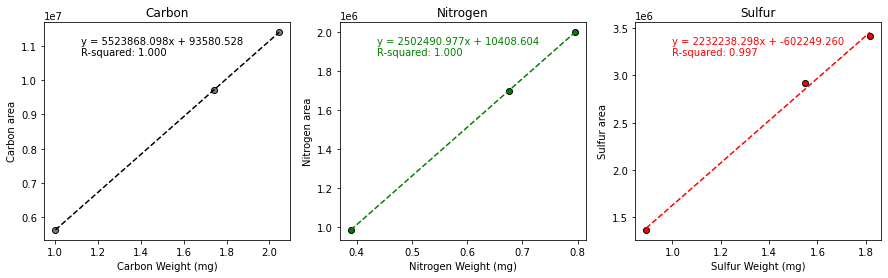

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(std['C_wtd'], std['C_area_bl'], facecolor='grey', edgecolor='black')
x = std['C_wtd']
y = std['C_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Carbon Weight (mg)')
ax.set_ylabel('Carbon area')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(std['N_wtd'], std['N_area_bl'], facecolor='green', edgecolor='black')
x = std['N_wtd']
y = std['N_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Nitrogen Weight (mg)')
ax.set_ylabel('Nitrogen area')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(std['S_wtd'], std['S_area_bl'], facecolor='red', edgecolor='black')
x = std['S_wtd']
y = std['S_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Sulfur Weight (mg)')
ax.set_ylabel('Sulfur area')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

# show plot
plt.show()

In [8]:
y = std['C_wtd']
x = std['C_area_bl']
C_coefficients = np.polyfit(x, y, 1)
C_slope = C_coefficients[0]

y = std['N_wtd']
x = std['N_area_bl']
N_coefficients = np.polyfit(x, y, 1)
N_slope = N_coefficients[0]

y = std['S_wtd']
x = std['S_area_bl']
S_coefficients = np.polyfit(x, y, 1)
S_slope = S_coefficients[0]

print(f"SLOPE")
print(f"Carbon slope:   {C_slope}")
print(f"Nitrogen slope: {N_slope}")
print(f"Sulfur slope:   {S_slope}")
print(f"")

# Subtract mean from respective columns and create new rows
df['N_wtd'] = df['N_area_bl'] * N_slope
df['C_wtd'] = df['C_area_bl'] * C_slope
df['S_wtd'] = df['S_area_bl'] * S_slope

# Subtract mean from respective columns and create new rows
df['N%'] = df['N_wtd'] / df['wtd'] *100
df['C%'] = df['C_wtd'] / df['wtd'] *100
df['S%'] = df['S_wtd'] / df['wtd'] *100

cs = df[df['name'].str.contains('CS_Cy')]
cs['cs_N%'] = cs['N%']/.1165 
cs['cs_C%'] = cs['C%']/.3 
cs['cs_S%'] = cs['S%']/.2666 

ca = df[df['name'].str.contains('Ca')]
ca['ca_C%'] = ca['C%']/.1199 

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])
print('CaCO3')
print(ca['ca_C%'])


SLOPE
Carbon slope:   1.810325526264001e-07
Nitrogen slope: 3.995927751681183e-07
Sulfur slope:   4.4672859603518365e-07

Check Standerd % est
Nitrogen
0     70.488306
0    150.243389
Name: cs_N%, dtype: float64
Carbon
0    104.955347
0    103.932565
Name: cs_C%, dtype: float64
Sulfer
0    58.670298
0    46.003606
Name: cs_S%, dtype: float64
CaCO3
0           NaN
0    101.723044
0    101.884969
Name: ca_C%, dtype: float64


C:\Users\12532\AppData\Local\Temp\ipykernel_15880\1691650609.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_N%'] = cs['N%']/.1165
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\1691650609.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_C%'] = cs['C%']/.3
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\1691650609.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [9]:
ds = df[df['name'].str.contains(str_id)]
ds['ID'] = ds['name'].str[-2:]
ds['Treat'] = TREAT
ds['Camp'] = CAMP
ds['Station'] = STN
ds['notes'] = "N CS was off"

selected_columns = ['ID', 'Treat', 'Camp', 'Station', 'N%', 'C%', 'S%', 'notes']
ds = ds[selected_columns]

ds.to_csv(Save_name, index=False, header=True)
ds

C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2695868477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['ID'] = ds['name'].str[-2:]
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2695868477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Treat'] = TREAT
C:\Users\12532\AppData\Local\Temp\ipykernel_15880\2695868477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,ID,Treat,Camp,Station,N%,C%,S%,notes
0,01,HCL,GOM22SU,St.11,0.420635,1.170910,0.126459,N CS was off
0,02,HCL,GOM22SU,St.11,0.410054,1.106360,0.269177,N CS was off
0,03,HCL,GOM22SU,St.11,0.347579,1.110862,0.105674,N CS was off
0,04,HCL,GOM22SU,St.11,0.375423,1.095483,0.090836,N CS was off
0,05,HCL,GOM22SU,St.11,0.355025,1.069611,0.088472,N CS was off
0,06,HCL,GOM22SU,St.11,0.353618,0.974432,0.103938,N CS was off
0,07,HCL,GOM22SU,St.11,0.339125,0.973896,0.066955,N CS was off
0,08,HCL,GOM22SU,St.11,0.332457,0.996473,0.093008,N CS was off
0,09,HCL,GOM22SU,St.11,0.350229,1.014457,0.044866,N CS was off
0,10,HCL,GOM22SU,St.11,0.323138,1.008920,0.041481,N CS was off


In [9]:
df

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,...,S_area,N_area_bl,C_area_bl,S_area_bl,N_wtd,C_wtd,S_wtd,N%,C%,S%
0,Tin,DfchA002,08/15/2023,19:03,By-Pass,NaN,NaN,NaN,NaN,NaN,...,0.00,6.308028e+04,1.766791e+04,0.00,0.023715,0.003171,0.000000,NaN,NaN,NaN
0,Blank,DfchA003,08/15/2023,19:15,Blank,NaN,NaN,NaN,NaN,NaN,...,0.00,6.339581e+04,1.657984e+04,0.00,0.023833,0.002975,0.000000,NaN,NaN,NaN
0,Blank,DfchA004,08/15/2023,19:27,Blank,NaN,NaN,NaN,NaN,NaN,...,0.00,7.087578e+04,1.590688e+04,0.00,0.026645,0.002855,0.000000,NaN,NaN,NaN
0,Blank,DfchA005,08/15/2023,19:39,Blank,NaN,NaN,NaN,NaN,NaN,...,0.00,7.216766e+04,1.611128e+04,0.00,0.027131,0.002891,0.000000,NaN,NaN,NaN
0,Cystine,DfchA006,08/15/2023,19:51,By-Pass,NaN,NaN,NaN,NaN,NaN,...,893264.00,3.413400e+04,3.220146e+06,893264.00,0.012832,0.577885,0.720562,NaN,NaN,NaN
0,STD_LOW,DfchA007,08/15/2023,20:03,STD,1.954,6.25,0.0,NaN,NaN,...,1009208.00,5.985677e+05,3.214944e+06,1009208.00,0.225027,0.576952,0.814090,11.516245,29.526708,41.662730
0,STD_MID,DfchA008,08/15/2023,20:15,STD,2.509,6.25,0.0,NaN,NaN,...,1286542.00,6.779130e+05,4.244940e+06,1286542.00,0.254857,0.761794,1.037805,10.157702,30.362472,41.363274
0,STD_HIGH,DfchA009,08/15/2023,20:28,STD,8.135,6.25,0.0,NaN,NaN,...,3088905.50,2.470668e+06,1.359074e+07,3088905.50,0.928831,2.438986,2.491703,11.417712,29.981391,30.629412
0,Tin,DfchA010,08/15/2023,20:40,By-Pass,NaN,NaN,NaN,NaN,NaN,...,0.00,7.780700e+04,0.000000e+00,0.00,0.029251,0.000000,0.000000,NaN,NaN,NaN
0,Blank,DfchA011,08/15/2023,20:52,Blank,NaN,NaN,NaN,NaN,NaN,...,0.00,9.008416e+04,1.718472e+04,0.00,0.033867,0.003084,0.000000,NaN,NaN,NaN


In [10]:
cs

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,...,S_area_bl,N_wtd,C_wtd,S_wtd,N%,C%,S%,cs_N%,cs_C%,cs_S%
0,CS_Cystine_Low,DfchA068,08/16/2023,04:18,UNK,2.747,6.25,0.0,NaN,NaN,...,0.0,0.243795,1.496473,0.0,8.874962,54.476638,0.0,76.179932,181.588795,0.0
0,CS_Cystine_High,DfchA069,08/16/2023,04:31,UNK,3.527,6.25,0.0,NaN,NaN,...,0.0,0.274458,1.780142,0.0,7.781625,50.471842,0.0,66.795063,168.239474,0.0
0,CS_CaCO3_Low,DfchA068,08/16/2023,04:18,UNK,12.495,6.25,0.0,NaN,NaN,...,0.0,0.243795,1.496473,0.0,1.951142,11.976577,0.0,16.748001,39.921922,0.0
0,CS_CaCO3_High,DfchA069,08/16/2023,04:31,UNK,14.852,6.25,0.0,NaN,NaN,...,0.0,0.274458,1.780142,0.0,1.847953,11.985873,0.0,15.862253,39.952910,0.0
